# Assignment 4
# Customer Segmentation Analysis


## Problem Statement:-
You own the mall and want to understand the customers who can quickly converge [Target Customers] so that the insight can be given to the marketing team and plan the strategy accordingly.




## Clustering the data and performing classification algorithms


## 1. Perform Below Visualizations.
### Univariate Analysis
#### 1. Summary Statistics

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [239]:
file_data = pd.read_csv('H:\HARI\HARI FILE\REC\IBM\Assignments\Mall_Customers.csv')
file_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [240]:
file_data['Age'].mean()

38.85

In [241]:
file_data['Age'].median()

36.0

In [242]:
file_data['Age'].std()

13.969007331558883

#### 2. Frequency Table

In [243]:
file_data['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

#### 3. Create Charts

<AxesSubplot:>

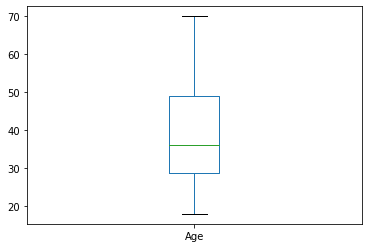

In [244]:
file_data.boxplot(column=['Age'], grid=False)


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

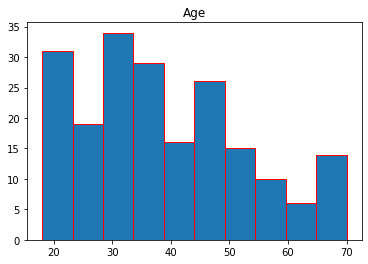

In [245]:
file_data.hist(column='Age', grid=False, edgecolor='Red')

<AxesSubplot:xlabel='Age', ylabel='Density'>

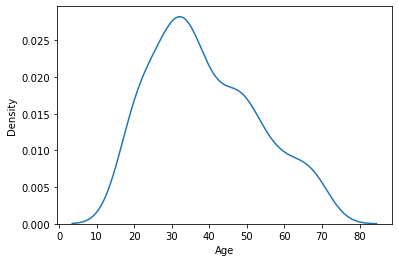

In [246]:
sns.kdeplot(file_data['Age'])

### Bi - Variate Analysis

#### 1. Scatterplots

Text(0, 0.5, 'Age')

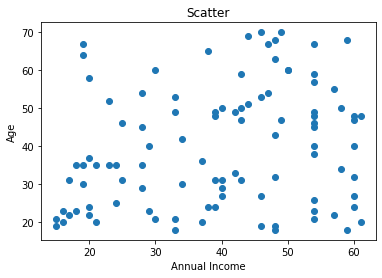

In [247]:
plt.scatter(x=file_data["Annual Income (k$)"].head(100), y=file_data.Age.head(100))
plt.title('Scatter')
plt.xlabel('Annual Income')
plt.ylabel('Age')

#### 2. Correlation Coefficients

In [248]:
file_data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


#### 3. Simple Linear Regression

In [249]:
y = file_data['Annual Income (k$)']
x = file_data['Spending Score (1-100)']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Annual Income (k$)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01942
Date:                Thu, 27 Oct 2022   Prob (F-statistic):              0.889
Time:                        20:49:22   Log-Likelihood:                -936.92
No. Observations:                 200   AIC:                             1878.
Df Residuals:                     198   BIC:                             1884.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     60.0544      4.078     14.726      0.000      52.012      68.097
Spending Score (1-100)     0.0101      0.072      0.139      0.889      -0.132       0.153
==============================================================================
Omnibus:                        3.510   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                3.531
Skew:                           0.319   Prob(JB):                        0.171
Kurtosis:                       2.875   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<BarContainer object of 5 artists>

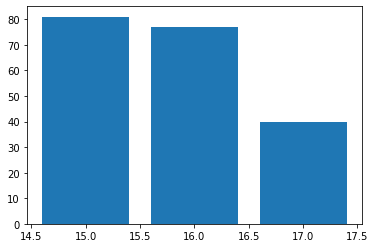

In [250]:
plt.bar(file_data['Annual Income (k$)'].head() ,file_data['Spending Score (1-100)'].head(),  )


### Multi - Variate Analysis

<AxesSubplot:>

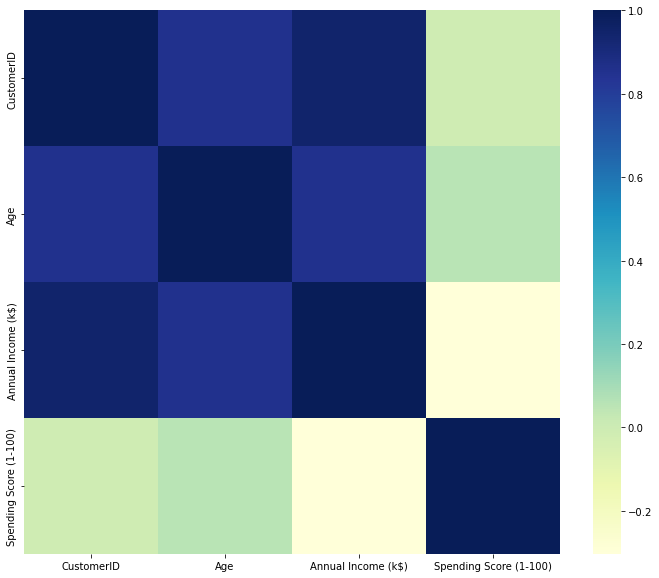

In [251]:
f = plt.subplots(figsize=(12,10))
sns.heatmap(file_data.head().corr(), cmap="YlGnBu")

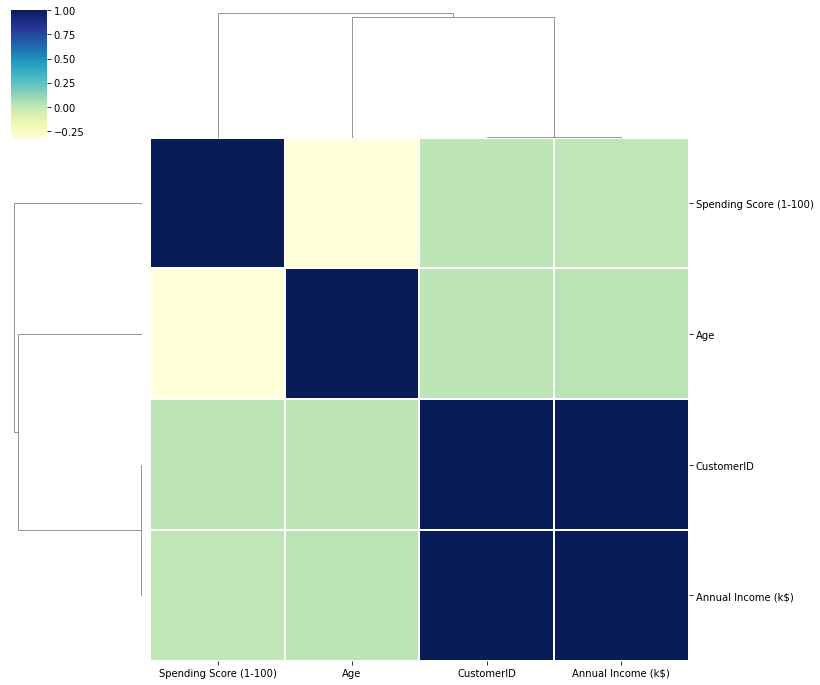

In [252]:
corrmat = file_data.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

## 4. Perform descriptive statistics on the dataset.


In [253]:
file_data.shape

(200, 5)

In [254]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [255]:
file_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [256]:
file_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [257]:
file_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [258]:
file_data["Annual Income (k$)"].mean()

60.56

In [259]:
file_data["Annual Income (k$)"].median()

61.5

In [260]:
file_data["Annual Income (k$)"].mode()

0    54
1    78
Name: Annual Income (k$), dtype: int64

In [261]:
file_data["Annual Income (k$)"].var()

689.8355778894478

In [262]:
file_data["Annual Income (k$)"].std()

26.264721165271254

In [263]:
file_data["Annual Income (k$)"].skew()

0.3218425498619055

In [264]:
file_data["Annual Income (k$)"].kurt()

-0.09848708652696203

In [265]:
quantile = file_data['Age'].quantile(q=[0.75, 0.25])
quantile

0.75    49.00
0.25    28.75
Name: Age, dtype: float64

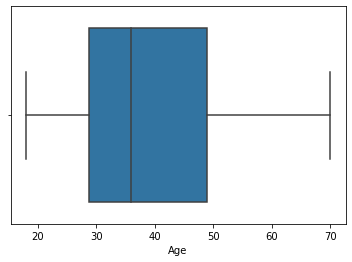

In [266]:
sns.boxplot(file_data["Age"])
import warnings
warnings.filterwarnings('ignore')

## 5. Handle the Missing values.

In [267]:
print(file_data.isnull())

     CustomerID  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0         False   False  False               False                   False
1         False   False  False               False                   False
2         False   False  False               False                   False
3         False   False  False               False                   False
4         False   False  False               False                   False
..          ...     ...    ...                 ...                     ...
195       False   False  False               False                   False
196       False   False  False               False                   False
197       False   False  False               False                   False
198       False   False  False               False                   False
199       False   False  False               False                   False

[200 rows x 5 columns]


In [268]:
print(file_data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [269]:
file_data.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

## 6. Find the outliers and replace the outliers

<AxesSubplot:xlabel='Age'>

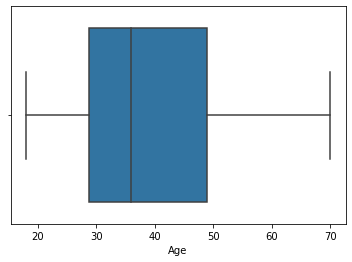

In [270]:
x = sns.boxplot(x=file_data["Age"])
x

<AxesSubplot:xlabel='Age'>

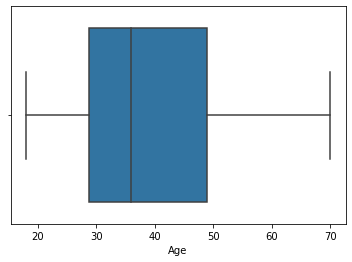

In [271]:
sns.boxplot(file_data['Age'])

In [272]:
file_data['Age']=np.where(file_data['Age']>57,39, file_data['Age'])

<AxesSubplot:xlabel='Age'>

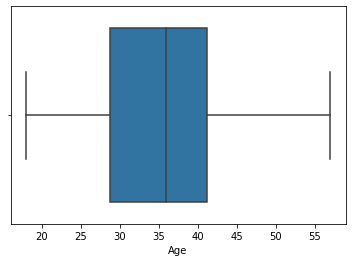

In [273]:
sns.boxplot(file_data['Age'])

## 7. Check for Categorical columns and perform encoding.

In [274]:
pd.Categorical(file_data["Annual Income (k$)"])

[15, 15, 16, 16, 17, ..., 120, 126, 126, 137, 137]
Length: 200
Categories (64, int64): [15, 16, 17, 18, ..., 113, 120, 126, 137]

In [275]:
# One Hot Encoding

pd.get_dummies(file_data["Annual Income (k$)"]).head(10)

,15,16,17,18,19,20,21,23,24,25,...,93,97,98,99,101,103,113,120,126,137
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [276]:
pd.get_dummies(file_data).head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
5,6,22,17,76,1,0
6,7,35,18,6,1,0
7,8,23,18,94,1,0
8,9,39,19,3,0,1
9,10,30,19,72,1,0


## 8. Scaling the data

In [277]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [278]:
label = LabelEncoder()
label = label.fit_transform(file_data['Gender'])
file_data["Gender"] = label
file_data['Gender'].value_counts()

X = file_data.drop("Age",axis=1)
Y = file_data['Age']

In [279]:
object1 = StandardScaler()
scale = object1.fit_transform(X) 
scale

array([[-1.7234121 ,  1.12815215, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.54815205,  1.04041783],
       [-1.48092195,  1.12815215, -1.54815205, -1.44416206],
       [-1.46360123,  1.12815215, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

In [280]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.738999,-0.434801
1,-1.706091,1.128152,-1.738999,1.195704
2,-1.688771,-0.886405,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.700830,1.040418
4,-1.654129,-0.886405,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.886405,2.268791,1.118061
196,1.671450,-0.886405,2.497807,-0.861839
197,1.688771,1.128152,2.497807,0.923953
198,1.706091,1.128152,2.917671,-1.250054


In [281]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0

SyntaxError: unexpected EOF while parsing (3559190390.py, line 1)

## 9. Perform any of the clustering algorithms

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = file_data.iloc[:, [3, 4]].values 

In [ ]:
list= []  
   
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    list.append(kmeans.inertia_)  
plt.plot(range(1, 11), list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

In [ ]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show() 

## 10. Add the cluster data with the primary dataset

In [ ]:
file_data['Cluster']=kmeans.labels_
file_data.head()

In [ ]:
file_data.tail()

## 11. Split the data into dependent and independent variables.

In [ ]:
X=file_data.drop('Cluster',axis=1)
Y=file_data['Cluster']
y=file_data['Cluster']
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

## 12. Split the data into training and testing

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

## 13. Build the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

## 14. Train the Model

In [ ]:
model.score(X_train,y_train)

## 15. Test the Model

In [ ]:
model.score(X_test,y_test)

## 16. Measure the performance using Evaluation Metrics.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
y_pred=model.predict(X_test)
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))